In [8]:
!pip install together
!pip install Pillow
!pip install matplotlib


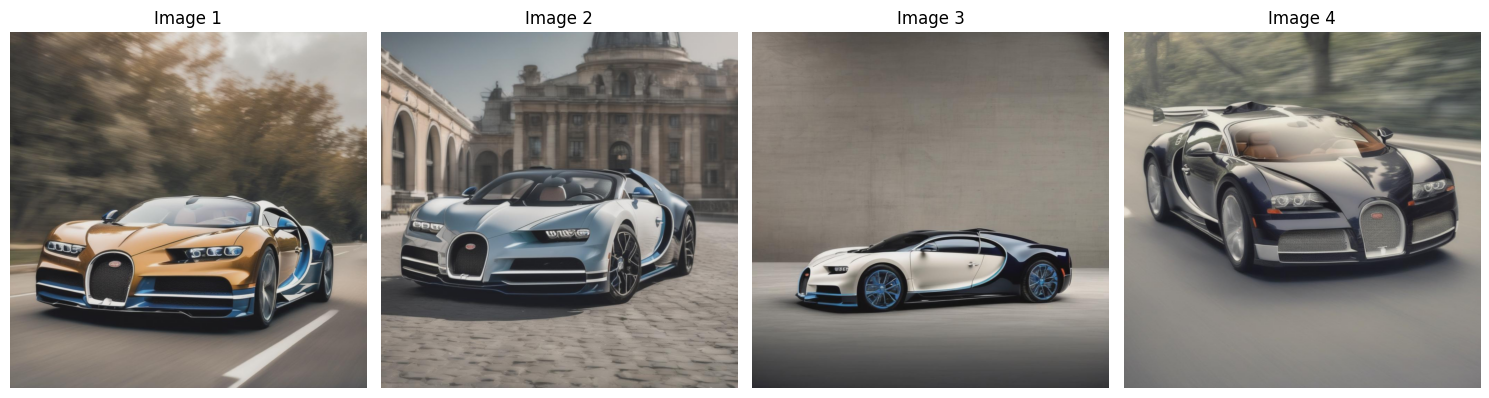

In [10]:
import os
from together import Together
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

# Initialize the client with your API key
client = Together(api_key="")
response = client.images.generate(
    prompt="a bugatti car",
    model="stabilityai/stable-diffusion-xl-base-1.0",
    width=1024,
    height=1024,
    steps=40,
    n=4,  # Adjust the number of images you want
    seed=1009
)

# Create a subplot for each image
num_images = len(response.data)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Loop through the images and display them
for i, data in enumerate(response.data):
    image_data = data.b64_json
    image = Image.open(BytesIO(base64.b64decode(image_data)))
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f'Image {i+1}')  # Optional title for each image

# Show the images
plt.tight_layout()
plt.show()

# Optionally save all images
for i, data in enumerate(response.data):
    image_data = data.b64_json
    image = Image.open(BytesIO(base64.b64decode(image_data)))
    image.save(f'bugatti_car_{i+1}.png')
